# 🧠 Feature Engineering & Classification: Mempersiapkan Data untuk Prediksi Sentimen 🔍

Setelah mendapatkan pemahaman awal dari proses **Exploratory Data Analysis (EDA)**, kini saatnya masuk ke tahap **Feature Engineering** dan **Modeling**, yaitu mengubah data teks menjadi bentuk numerik yang dapat dipahami oleh algoritma Machine Learning.

Langkah-langkah pada tahap ini mencakup:
- 🔡 **Representasi Teks** menggunakan teknik **TF-IDF**, **Universal Sentence Encoder (USE)**, dan gabungan **(TF-IDF + USE)**
- 🧪 **Split Data** menjadi data latih dan data uji untuk evaluasi model yang adil
- 🤖 **Klasifikasi Sentimen** dengan berbagai algoritma Machine Learning seperti:
  - Linear Support Vector Machine (SVM)
  - Logistic Regression (LR)
  - Naive Bayes
  - XGBoost
  - Random Forest
---

## 🔧 **Libraries Used**

In [16]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

#Import libraries for Classification with various classifiers
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from timeit import default_timer as timer

## 📥 **Import Data CSV**

In [17]:
# Import data
file_path = "../data/2_preprocess_running_tracker.csv"
df = pd.read_csv(file_path)
print(df.shape)
df.head()

(22961, 14)


,reviewId,userName,userImage,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_cleaned,sentiment_polarity,sentiment_subjective,sentiment_rating
0,aaa7089c-2edc-46de-84d1-ef6434a011f2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,5,0,1.7.4,2025-03-12 09:42:30,No Reply,No Reply,1.7.4,really like,0.20,0.200000,Positive
1,a02fb34e-14a1-4345-8b63-dc3b9ddd1f74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,4,0,1.7.4,2025-03-12 06:48:45,Your praise is the greatest encouragement to u...,2025-03-12 14:16:05,1.7.4,good,0.70,0.600000,Positive
2,0be62035-3d04-4d3d-b2a6-9efd5c48cbab,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,1,0,1.7.4,2025-03-12 06:17:30,"Hi, thanks for your feedback. Could you send u...",2025-03-12 14:47:29,1.7.4,cannot away notifications,0.00,0.000000,Negative
3,28ebad27-72a8-4eca-9fce-2905485b078f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,5,0,1.7.5,2025-03-12 00:38:33,No Reply,No Reply,1.7.5,great,0.80,0.750000,Positive
4,f9d6dee5-6a10-42ec-8009-16b487a5e075,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,5,0,1.7.5,2025-03-11 22:23:05,No Reply,No Reply,1.7.5,not bad,0.35,0.666667,Positive


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22961 entries, 0 to 22960
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              22961 non-null  object 
 1   userName              22961 non-null  object 
 2   userImage             22961 non-null  object 
 3   score                 22961 non-null  int64  
 4   thumbsUpCount         22961 non-null  int64  
 5   reviewCreatedVersion  22961 non-null  object 
 6   at                    22961 non-null  object 
 7   replyContent          22961 non-null  object 
 8   repliedAt             22961 non-null  object 
 9   appVersion            22961 non-null  object 
 10  content_cleaned       22961 non-null  object 
 11  sentiment_polarity    22961 non-null  float64
 12  sentiment_subjective  22961 non-null  float64
 13  sentiment_rating      22961 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 2.5+ MB


In [19]:
# Hapus kolom yang tidak dibutuhkan
df = df[['content_cleaned', 'sentiment_rating']]

# Rename kolom sesuai keinginan
df = df.rename(columns={'content_cleaned': 'review', 'sentiment_rating': 'sentiment'})

# Cek hasilnya
print(df.head())


                      review sentiment
0                really like  Positive
1                       good  Positive
2  cannot away notifications  Negative
3                      great  Positive
4                    not bad  Positive


## 🔀 **Data Splitting**

In [20]:
## Split x=feature, y=target
x = df['review']
y = df['sentiment']

label_encode = LabelEncoder()
Y = label_encode.fit_transform(y)
print("Label hasil encoding:", Y[:10])  
print("Mapping Label Encoding:", dict(zip(label_encode.classes_, range(len(label_encode.classes_)))))

Label hasil encoding: [2 2 0 2 2 2 2 2 2 2]
Mapping Label Encoding: {'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [21]:
## Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.2, random_state=42)

## 🧱 **Vocabulary Creation** : Menyusun Representasi Kata dari Data Latih

In [22]:
# Create a vocabulary
from collections import Counter
word_counts = Counter(' '.join(xtrain).split())

In [23]:
for word, count in word_counts.items():
    print(f"{word}: {count}")

nice: 2194
love: 785
make: 173
easy: 693
track: 1376
everything: 140
need: 309
one: 333
place: 38
active: 14
correct: 70
readings: 16
very: 37
good: 6801
application: 240
super: 328
cannot: 139
calculate: 65
distance: 858
walk: 275
show: 350
wow: 103
find: 121
map: 406
cool: 157
thank: 306
awesome: 610
apps: 393
efficient: 11
also: 216
work: 738
offline: 51
able: 47
process: 6
great: 1620
help: 343
really: 801
would: 210
pound: 6
stick: 11
routine: 15
best: 1095
measure: 133
jog: 101
perfect: 248
not: 1472
take: 92
space: 7
crash: 30
gas: 392
loose: 16
sometimes: 62
pace: 174
accurate: 666
time: 712
helpful: 326
user: 88
friendly: 67
strongly: 6
recommend: 211
start: 205
yet: 31
let: 43
know: 164
later: 13
tracker: 173
use: 1357
navigate: 10
first: 264
run: 1934
fast: 40
register: 13
phone: 120
lock: 52
useless: 61
vary: 18
like: 621
different: 67
options: 24
program: 29
offer: 9
thing: 56
check: 53
google: 49
fit: 48
titbit: 13
notice: 24
miss: 20
almost: 49
pm: 107
decrease: 4
still:

In [24]:
vocab = [word for word, count in word_counts.most_common()]
vocab

['good',
 'nice',
 'run',
 'great',
 'not',
 'track',
 'use',
 'best',
 'distance',
 'really',
 'love',
 'work',
 'time',
 'easy',
 'accurate',
 'like',
 'awesome',
 'amaze',
 'map',
 'apps',
 'gas',
 'far',
 'useful',
 'show',
 'help',
 'one',
 'super',
 'helpful',
 'need',
 'thank',
 'well',
 'get',
 'walk',
 'first',
 'experience',
 'give',
 'perfect',
 'application',
 'miles',
 'want',
 'keep',
 'try',
 'free',
 'also',
 'recommend',
 'much',
 'would',
 'start',
 'route',
 'say',
 'record',
 'stop',
 'even',
 'simple',
 'see',
 'pace',
 'make',
 'tracker',
 'ads',
 'know',
 'mile',
 'pretty',
 'cool',
 'feature',
 'go',
 'better',
 'way',
 'fitness',
 'lot',
 'everything',
 'train',
 'cannot',
 'data',
 'every',
 'measure',
 'bad',
 'day',
 'result',
 'many',
 'star',
 'superb',
 'please',
 'look',
 'find',
 'phone',
 'workout',
 'speed',
 'excellent',
 'progress',
 'think',
 'calories',
 'download',
 'pm',
 'wrong',
 'happy',
 'lose',
 'wow',
 'jog',
 'without',
 'add',
 'ever',
 

# TF-IDF Embedding & Classification
1. Linear SVM
2. Logistic Regression (LR)
3. Naive Bayes
4. XGBoost
5. Random Forest

In [26]:
## Initialize classifiers
svm_classifier = LinearSVC()
logistic_regression = LogisticRegression(max_iter=1000)
nb_classifier = MultinomialNB()
xgboost_classifier = XGBClassifier()
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='sqrt', min_samples_leaf=4, bootstrap=True, n_jobs=-1, random_state=42)


In [27]:
def evaluate_model(model, xtest, ytest):
    # Prediksi dengan model
    y_pred = model.predict(xtest)

    # Evaluasi hasil prediksi
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred, average='weighted')  # Pakai average='weighted' untuk multiclass
    recall = recall_score(ytest, y_pred, average='weighted')
    f1 = f1_score(ytest, y_pred, average='weighted')

    # Laporan klasifikasi dan matriks kebingungan
    report = classification_report(ytest, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
    cm = confusion_matrix(ytest, y_pred)

    return y_pred, accuracy, precision, recall, f1, report, cm

In [28]:
# Define batch size
batch_size = 1000

## **TF-IDF Embedding**

In [29]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [30]:
tfidf_vectorizer.fit(xtrain)

TfidfVectorizer(max_features=5000)

In [31]:
import numpy as np
start = timer()
tfidf_vectorizer_xtrain = np.vstack([
    tfidf_vectorizer.transform(xtrain[i:i + batch_size]).toarray()  # Batching dengan ukuran batch_size
    for i in range(0, len(xtrain), batch_size)
])
print('Waktu yang dibutuhkan untuk embedding TF-IDF pada data train:', timer() - start)

Waktu yang dibutuhkan untuk embedding TF-IDF pada data train: 0.2823674000101164


In [32]:
# Embedding TF-IDF untuk data test dengan batching
start = timer()
tfidf_vectorizer_xtest = np.vstack([
    tfidf_vectorizer.transform(xtest[i:i + batch_size]).toarray()  # Batching dengan ukuran batch_size
    for i in range(0, len(xtest), batch_size)
])
print('Waktu yang dibutuhkan untuk embedding TF-IDF pada data test:', timer() - start)

Waktu yang dibutuhkan untuk embedding TF-IDF pada data test: 0.06789039995055646


In [33]:
# Fit classifiers
print(type(tfidf_vectorizer_xtrain))  # Harusnya <class 'numpy.ndarray'>
print(tfidf_vectorizer_xtrain.shape)

print(type(tfidf_vectorizer_xtest))  # Harusnya <class 'numpy.ndarray'>
print(tfidf_vectorizer_xtest.shape)


<class 'numpy.ndarray'>
(18368, 1312)
<class 'numpy.ndarray'>
(4593, 1312)


In [34]:
# Training model dan mengukur waktu yang dibutuhkan
start = timer()
svm_tfidf = svm_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Linear SVM classifier:', timer() - start)

start = timer()
lr_tfidf = logistic_regression.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Logistic Regression classifier:', timer() - start)

start = timer()
nb_tfidf = nb_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Naive Bayes classifier:', timer() - start)

start = timer()
xgboost_tfidf = xgboost_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training XGBoost classifier:', timer() - start)

start = timer()
rfc_tfidf = random_forest_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Random Forest classifier:', timer() - start)

Required time for training Linear SVM classifier: 1.3022019999334589
Required time for training Logistic Regression classifier: 2.92649069998879
Required time for training Naive Bayes classifier: 0.057824700023047626
Required time for training XGBoost classifier: 8.27806879999116
Required time for training Random Forest classifier: 0.9681877000257373


## **1. Linear SVM**

In [35]:
start = timer()
y_pred_svm, accuracy_svm, precision_svm, recall_svm, f1_svm, report_svm, confusion_matrix_svm = evaluate_model(svm_tfidf, tfidf_vectorizer_xtest, ytest)
print('Waktu prediksi SVM:', timer() - start)

Waktu prediksi SVM: 0.03371069999411702


In [36]:
# Print actual vs. predicted results for LinearSVM
## Menampilkan label kelas unik pada data testing
print("=== Label Kelas yang Ada ===")
print(set(ytest))

## Menampilkan contoh hasil prediksi SVM (15 data pertama)
print("\nContoh 15 hasil prediksi SVM:")
for actual, predicted in zip(ytest[:15], y_pred_svm[:15]):
    print(f"Actual: {actual}, SVM Predicted: {predicted}")

=== Label Kelas yang Ada ===
{np.int64(0), np.int64(1), np.int64(2)}

Contoh 15 hasil prediksi SVM:
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 1, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2
Actual: 2, SVM Predicted: 2


In [37]:
# Menampilkan hasil evaluasi
print("\n=== Evaluasi SVM ===")
print(f"Accuracy SVM: {accuracy_svm:.4f}")
print(f"Precision SVM: {precision_svm:.4f}")
print(f"Recall SVM: {recall_svm:.4f}")
print(f"F1 Score SVM: {f1_svm:.4f}")

print("\n=== Classification Report SVM ===")
print(report_svm)

print("\n=== Confusion Matrix SVM ===")
print(confusion_matrix_svm)


=== Evaluasi SVM ===
Accuracy SVM: 0.9447
Precision SVM: 0.9303
Recall SVM: 0.9447
F1 Score SVM: 0.9366

=== Classification Report SVM ===
              precision    recall  f1-score   support

    Negative       0.77      0.64      0.70       341
     Neutral       0.07      0.01      0.02        77
    Positive       0.96      0.99      0.97      4175

    accuracy                           0.94      4593
   macro avg       0.60      0.55      0.57      4593
weighted avg       0.93      0.94      0.94      4593


=== Confusion Matrix SVM ===
[[ 219    4  118]
 [  19    1   57]
 [  46   10 4119]]


## **2. Logistic Regression (LR)**

In [38]:
start = timer()
y_pred_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, report_lr, cm_lr = evaluate_model(logistic_regression, tfidf_vectorizer_xtest, ytest)
print('Required time for Logistic Regression prediction:', timer() - start)

Required time for Logistic Regression prediction: 0.023070499999448657


In [39]:
# Print actual vs. predicted results for Logistic Regression
print("\n=== Contoh Prediksi Logistic Regression ===")
print("Label Kelas:", set(ytest))  # Menampilkan label kelas unik dari ytest
for actual, predicted in zip(ytest[:15], y_pred_lr[:15]):
    print(f"Actual: {actual}, Logistic Regression Predicted: {predicted}")


=== Contoh Prediksi Logistic Regression ===
Label Kelas: {np.int64(0), np.int64(1), np.int64(2)}
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 1, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2
Actual: 2, Logistic Regression Predicted: 2


In [40]:
print("\n=== Evaluasi Logistic Regression ===")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision (weighted): {precision_lr:.4f}")  # Menggunakan 'weighted' untuk multi-class
print(f"Recall (weighted): {recall_lr:.4f}")
print(f"F1-Score (weighted): {f1_lr:.4f}")
print("\nClassification Report:\n", report_lr)
print("Confusion Matrix:\n", cm_lr)


=== Evaluasi Logistic Regression ===
Accuracy: 0.9506
Precision (weighted): 0.9437
Recall (weighted): 0.9506
F1-Score (weighted): 0.9413

Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.65      0.72       341
     Neutral       0.67      0.03      0.05        77
    Positive       0.96      0.99      0.98      4175

    accuracy                           0.95      4593
   macro avg       0.81      0.56      0.58      4593
weighted avg       0.94      0.95      0.94      4593

Confusion Matrix:
 [[ 223    0  118]
 [  20    2   55]
 [  33    1 4141]]


## **3. Naive Bayes**

In [41]:
start = timer()
y_pred_nb, accuracy_nb, precision_nb, recall_nb, f1_nb, report_nb, cm_nb = evaluate_model(nb_classifier, tfidf_vectorizer_xtest, ytest)
print('Required time for Naive Bayes prediction:', timer() - start)

Required time for Naive Bayes prediction: 0.02642020001076162


In [42]:
print("\n=== Contoh Prediksi Naive Bayes ===")
print("Label Kelas:", set(ytest))  # Menampilkan label kelas unik dari ytest
for actual, predicted in zip(ytest[:15], y_pred_nb[:15]):
    print(f"Actual: {actual}, Naive Bayes Predicted: {predicted}")


=== Contoh Prediksi Naive Bayes ===
Label Kelas: {np.int64(0), np.int64(1), np.int64(2)}
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 1, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2
Actual: 2, Naive Bayes Predicted: 2


In [43]:
print("\n=== Evaluasi Naive Bayes ===")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision (weighted): {precision_nb:.4f}")  # Menggunakan 'weighted' karena multiclass
print(f"Recall (weighted): {recall_nb:.4f}")
print(f"F1-Score (weighted): {f1_nb:.4f}")
print("\nClassification Report:\n", report_nb)
print("Confusion Matrix:\n", cm_nb)


=== Evaluasi Naive Bayes ===
Accuracy: 0.9462
Precision (weighted): 0.9446
Recall (weighted): 0.9462
F1-Score (weighted): 0.9369

Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.63      0.68       341
     Neutral       1.00      0.01      0.03        77
    Positive       0.96      0.99      0.97      4175

    accuracy                           0.95      4593
   macro avg       0.90      0.55      0.56      4593
weighted avg       0.94      0.95      0.94      4593

Confusion Matrix:
 [[ 216    0  125]
 [  32    1   44]
 [  46    0 4129]]


## **4. XGBoost**

In [44]:
start = timer()
y_pred_xgboost, accuracy_xgboost, precision_xgboost, recall_xgboost, f1_xgboost, report_xgboost, cm_xgboost = evaluate_model(xgboost_classifier, tfidf_vectorizer_xtest, ytest)
print('Required time for XGBoost classifier prediction:', timer() - start)

Required time for XGBoost classifier prediction: 0.05804499995429069


In [45]:
# Print actual vs. predicted results for XGBoost classifier
print("\n=== Contoh Prediksi XGBoost ===")
print("Label Kelas:", set(ytest))  # Menampilkan label kelas unik dari ytest
for actual, predicted in zip(ytest[:15], y_pred_xgboost[:15]):
    print(f"Actual: {actual}, XGBoost Predicted: {predicted}")


=== Contoh Prediksi XGBoost ===
Label Kelas: {np.int64(0), np.int64(1), np.int64(2)}
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 1, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2
Actual: 2, XGBoost Predicted: 2


In [46]:
print("\n=== Evaluasi XGBoost ===")
print(f"Accuracy: {accuracy_xgboost:.4f}")
print(f"Precision (weighted): {precision_xgboost:.4f}")  # Menggunakan 'weighted' karena multiclass
print(f"Recall (weighted): {recall_xgboost:.4f}")
print(f"F1-Score (weighted): {f1_xgboost:.4f}")
print("\nClassification Report:\n", report_xgboost)
print("Confusion Matrix:\n", cm_xgboost)


=== Evaluasi XGBoost ===
Accuracy: 0.9477
Precision (weighted): 0.9343
Recall (weighted): 0.9477
F1-Score (weighted): 0.9393

Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.64      0.70       341
     Neutral       0.20      0.03      0.05        77
    Positive       0.96      0.99      0.98      4175

    accuracy                           0.95      4593
   macro avg       0.64      0.55      0.57      4593
weighted avg       0.93      0.95      0.94      4593

Confusion Matrix:
 [[ 219    6  116]
 [  26    2   49]
 [  41    2 4132]]


## **5. Random Forest**

In [47]:
start = timer()
y_pred_rfc, accuracy_rfc, precision_rfc, recall_rfc, f1_rfc, report_rfc, cm_rfc = evaluate_model(random_forest_classifier, tfidf_vectorizer_xtest, ytest)
print('Required time for Random Forest classifier prediction: ', timer() - start)

Required time for Random Forest classifier prediction:  0.09062859998084605


e:\Magang\env310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Magang\env310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Magang\env310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Magang\env310\lib\site-packages\sklearn\metrics\_classificati

In [48]:
# Print actual vs. predicted results for Random Forest classifier
print("\n=== Contoh Prediksi Random Forest ===")
print("Label Kelas:", set(ytest))  # Menampilkan label kelas unik dari ytest
for actual, predicted in zip(ytest[:15], y_pred_rfc[:15]):
    print(f"Actual: {actual}, Random Forest Predicted: {predicted}")


=== Contoh Prediksi Random Forest ===
Label Kelas: {np.int64(0), np.int64(1), np.int64(2)}
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 1, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2
Actual: 2, Random Forest Predicted: 2


In [49]:
print("\n=== Evaluasi Random Forest ===")
print(f"Accuracy: {accuracy_rfc:.4f}")
print(f"Precision (weighted): {precision_rfc:.4f}")  # Menggunakan 'weighted' karena multiclass
print(f"Recall (weighted): {recall_rfc:.4f}")
print(f"F1-Score (weighted): {f1_rfc:.4f}")
print("\nClassification Report:\n", report_rfc)
print("Confusion Matrix:\n", cm_rfc)


=== Evaluasi Random Forest ===
Accuracy: 0.9090
Precision (weighted): 0.8263
Recall (weighted): 0.9090
F1-Score (weighted): 0.8657

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       341
     Neutral       0.00      0.00      0.00        77
    Positive       0.91      1.00      0.95      4175

    accuracy                           0.91      4593
   macro avg       0.30      0.33      0.32      4593
weighted avg       0.83      0.91      0.87      4593

Confusion Matrix:
 [[   0    0  341]
 [   0    0   77]
 [   0    0 4175]]


## **Display all five models accuracy**

In [50]:
model_names = ['SVM', 'Logistic Regression', 'Naive Bayes', 'XGBoost', 'Random Forest']
model_accuracies = [accuracy_svm, accuracy_lr, accuracy_nb, accuracy_xgboost, accuracy_rfc]

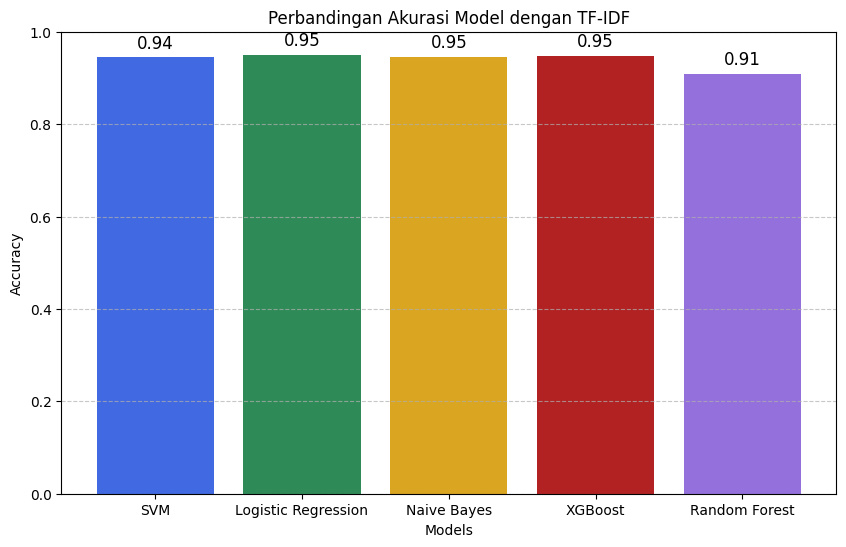

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['royalblue', 'seagreen', 'goldenrod', 'firebrick', 'mediumpurple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model dengan TF-IDF")
plt.ylim(0.0, 1.0)  # Set y-axis from 0 to 1 (100%)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai akurasi pada setiap batang
for i, acc in enumerate(model_accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', color='black', fontsize=12)

# Menampilkan plot
plt.show()

# Universal Sentence Encoder & Classification
1. Linear SVM
2. Logistic Regression
3. XGBoost classifier
4. Random Forest classifier

In [52]:
# Load the Universal Sentence Encoder model, and embed this model
start = timer()
use_embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
print('Required time for loading Universal Sentence Encoder (USE) from TensorFlow Hub:', timer() - start)


Required time for loading Universal Sentence Encoder (USE) from TensorFlow Hub: 1676.0756427999586


In [53]:
xtrain_use = []
xtest_use = []

In [54]:
start = timer()
for i in range(0, len(xtrain), batch_size):
    batch_xtrain = xtrain[i:i + batch_size]
    batch_xtrain_use = np.array(use_embed(batch_xtrain))
    xtrain_use.extend(batch_xtrain_use)
print('Required time for embedding xtrain with Universal Sentence Encoder (USE):', timer() - start)

Required time for embedding xtrain with Universal Sentence Encoder (USE): 1.9731060999911278


In [55]:
start = timer()
for i in range(0, len(xtest), batch_size):
    batch_xtest = xtest[i:i + batch_size]
    batch_xtest_use = np.array(use_embed(batch_xtest))
    xtest_use.extend(batch_xtest_use)
print('Required time for embedding xtest with Universal Sentence Encoder (USE):', timer() - start)

Required time for embedding xtest with Universal Sentence Encoder (USE): 0.23051609995309263


## **Fit classifiers**

In [56]:
# Training dengan Linear SVM
start = timer()
svm_model_use = svm_classifier.fit(xtrain_use, ytrain)
print('Required time for training Linear SVM classifier (USE):', timer() - start)

# Training dengan Logistic Regression
start = timer()
lr_model_use = logistic_regression.fit(xtrain_use, ytrain)
print('Required time for training Logistic Regression (USE):', timer() - start)

# Training dengan XGBoost
start = timer()
xgboost_model_use = xgboost_classifier.fit(xtrain_use, ytrain)
print('Required time for training XGBoost classifier (USE):', timer() - start)

# Training dengan Random Forest
start = timer()
rfc_model_use = random_forest_classifier.fit(xtrain_use, ytrain)
print('Required time for training Random Forest classifier (USE):', timer() - start)

Required time for training Linear SVM classifier (USE): 17.359083499992266
Required time for training Logistic Regression (USE): 0.9540294000180438
Required time for training XGBoost classifier (USE): 10.050981300068088
Required time for training Random Forest classifier (USE): 1.4028615000424907


## **1. Linear SVM**

In [57]:
start = timer()
y_pred_svm_use, accuracy_svm_use, precision_svm_use, recall_svm_use, f1_svm_use, report_svm_use, cm_svm_use = evaluate_model(svm_model_use, xtest_use, ytest)
print('Required time for Linear SVM prediction with USE :- ', timer() - start)

Required time for Linear SVM prediction with USE :-  0.1043996000662446


In [58]:
# Print actual vs. predicted results for LinearSVM with USE
print("=== Hasil Prediksi SVM dengan USE Embedding ===")
for actual, predicted in zip(ytest[:15], y_pred_svm_use[:15]):
    print(f"Actual: {actual}, SVM with USE embedding Predicted: {predicted}")
print()

=== Hasil Prediksi SVM dengan USE Embedding ===
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 1, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2
Actual: 2, SVM with USE embedding Predicted: 2



In [59]:
print(f"LinearSVM (USE) Accuracy: {accuracy_svm_use:.2f}")
print(f"LinearSVM (USE) Precision: {precision_svm_use:.2f}")
print(f"LinearSVM (USE) Recall: {recall_svm_use:.2f}")
print(f"LinearSVM (USE) F1 score: {f1_svm_use:.2f}")
print("\nClassification Report:")
print(report_svm_use)
print("\nConfusion Matrix:")
print(cm_svm_use)

LinearSVM (USE) Accuracy: 0.95
LinearSVM (USE) Precision: 0.94
LinearSVM (USE) Recall: 0.95
LinearSVM (USE) F1 score: 0.94

Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.69      0.73       341
     Neutral       0.25      0.01      0.02        77
    Positive       0.97      0.99      0.98      4175

    accuracy                           0.95      4593
   macro avg       0.66      0.56      0.58      4593
weighted avg       0.94      0.95      0.94      4593


Confusion Matrix:
[[ 236    3  102]
 [  29    1   47]
 [  44    0 4131]]


## **2. Logistic Regression (LR)**

In [60]:
start = timer()
y_pred_lr_use, accuracy_lr_use, precision_lr_use, recall_lr_use, f1_lr_use, report_lr_use, cm_lr_use = evaluate_model(lr_model_use, xtest_use, ytest)
print('Required time for Logistic Regression prediction with USE :- ', timer() - start)

Required time for Logistic Regression prediction with USE :-  0.03691620007157326


In [61]:
# Print actual vs. predicted results for Logistic Regression with USE
print("=== Hasil Prediksi Logistic Regression dengan USE Embedding ===")
for actual, predicted in zip(ytest[:15], y_pred_lr_use[:15]):
    print(f"Actual: {actual}, Logistic Regression with USE embedding Predicted: {predicted}")
print()

=== Hasil Prediksi Logistic Regression dengan USE Embedding ===
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 1, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Predicted: 2
Actual: 2, Logistic Regression with USE embedding Pred

In [62]:
print(f"Logistic Regression (USE) Accuracy: {accuracy_lr_use:.2f}")
print(f"Logistic Regression (USE) Precision: {precision_lr_use:.2f}")
print(f"Logistic Regression (USE) Recall: {recall_lr_use:.2f}")
print(f"Logistic Regression (USE) F1 score: {f1_lr_use:.2f}")
print("\nClassification Report:")
print(report_lr_use)
print("\nConfusion Matrix:")
print(cm_lr_use)

Logistic Regression (USE) Accuracy: 0.95
Logistic Regression (USE) Precision: 0.94
Logistic Regression (USE) Recall: 0.95
Logistic Regression (USE) F1 score: 0.94

Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.70      0.73       341
     Neutral       0.25      0.01      0.02        77
    Positive       0.97      0.99      0.98      4175

    accuracy                           0.95      4593
   macro avg       0.66      0.57      0.58      4593
weighted avg       0.94      0.95      0.94      4593


Confusion Matrix:
[[ 239    2  100]
 [  29    1   47]
 [  50    1 4124]]


## **3. XGBoost classifier**

In [63]:
start = timer()
y_pred_xgboost_use, accuracy_xgboost_use, precision_xgboost_use, recall_xgboost_use, f1_xgboost_use, report_xgboost_use, cm_xgboost_use = evaluate_model(xgboost_model_use, xtest_use, ytest)
print('Required time for XGBoost classifier prediction with USE:- ', timer() - start)

Required time for XGBoost classifier prediction with USE:-  0.06156970001757145


In [64]:
# Print actual vs. predicted results for XGBooost classifier with USE
print("=== Hasil Prediksi XGBoost dengan USE Embedding ===")
for actual, predicted in zip(ytest[:15], y_pred_xgboost_use[:15]):
    print(f"Actual: {actual}, XGBoost with USE embedding Predicted: {predicted}")
print()

=== Hasil Prediksi XGBoost dengan USE Embedding ===
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 1, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2
Actual: 2, XGBoost with USE embedding Predicted: 2



In [65]:
print(f"XGBoost (USE) Accuracy: {accuracy_xgboost_use:.2f}")
print(f"XGBoost (USE) Precision: {precision_xgboost_use:.2f}")
print(f"XGBoost (USE) Recall: {recall_xgboost_use:.2f}")
print(f"XGBoost (USE) F1 score: {f1_xgboost_use:.2f}")
print("\nClassification Report:")
print(report_xgboost_use)
print("\nConfusion Matrix:")
print(cm_xgboost_use)

XGBoost (USE) Accuracy: 0.95
XGBoost (USE) Precision: 0.94
XGBoost (USE) Recall: 0.95
XGBoost (USE) F1 score: 0.94

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.70      0.74       341
     Neutral       0.50      0.01      0.03        77
    Positive       0.97      0.99      0.98      4175

    accuracy                           0.95      4593
   macro avg       0.75      0.57      0.58      4593
weighted avg       0.94      0.95      0.94      4593


Confusion Matrix:
[[ 240    1  100]
 [  28    1   48]
 [  37    0 4138]]


## **4. Random Forest classifier**

In [66]:
start = timer()
y_pred_rfc_use, accuracy_rfc_use, precision_rfc_use, recall_rfc_use, f1_rfc_use, report_rfc_use, cm_rfc_use = evaluate_model(rfc_model_use, xtest_use, ytest)
print('Required time for Random Forest classifier prediction with USE:- ', timer() - start)


Required time for Random Forest classifier prediction with USE:-  0.10720399999991059


e:\Magang\env310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Magang\env310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Magang\env310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Magang\env310\lib\site-packages\sklearn\metrics\_classificati

In [67]:
# Print actual vs. predicted results for Random Forest classifier with USE
print("=== Hasil Prediksi Random Forest dengan USE Embedding (Multiple Class) ===")
print("Label: 0 = Negatif, 1 = Netral, 2 = Positif")  # Menyesuaikan label multiple class
for actual, predicted in zip(ytest[:15], y_pred_rfc_use[:15]):
    print(f"Actual: {actual}, Random Forest with USE embedding Predicted: {predicted}")
print()

=== Hasil Prediksi Random Forest dengan USE Embedding (Multiple Class) ===
Label: 0 = Negatif, 1 = Netral, 2 = Positif
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 1, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2
Actual: 2, Random Forest with USE embedding Predicted: 2



In [68]:
print(f"Random Forest (USE) Accuracy: {accuracy_rfc_use:.2f}")
print(f"Random Forest (USE) Precision: {precision_rfc_use:.2f}")
print(f"Random Forest (USE) Recall: {recall_rfc_use:.2f}")
print(f"Random Forest (USE) F1 score: {f1_rfc_use:.2f}")
print("\nClassification Report:")
print(report_rfc_use)
print("\nConfusion Matrix:")
print(cm_rfc_use)

Random Forest (USE) Accuracy: 0.91
Random Forest (USE) Precision: 0.90
Random Forest (USE) Recall: 0.91
Random Forest (USE) F1 score: 0.87

Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.04      0.07       341
     Neutral       0.00      0.00      0.00        77
    Positive       0.91      1.00      0.95      4175

    accuracy                           0.91      4593
   macro avg       0.61      0.35      0.34      4593
weighted avg       0.90      0.91      0.87      4593


Confusion Matrix:
[[  13    0  328]
 [   1    0   76]
 [   0    0 4175]]


## **Display all four models accuracy**

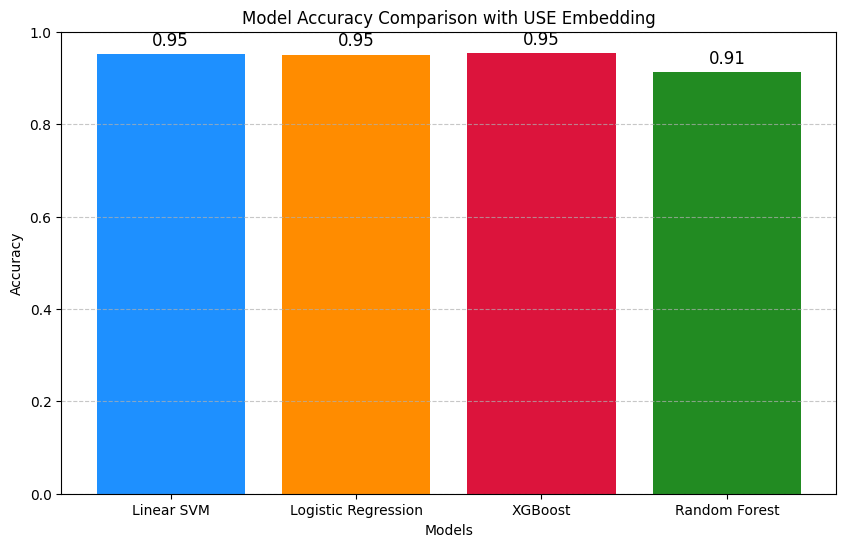

In [69]:
# List model names dan akurasi sesuai hasil evaluasi sebelumnya
model_names = ['Linear SVM', 'Logistic Regression', 'XGBoost', 'Random Forest']
model_accuracies = [accuracy_svm_use, accuracy_lr_use, accuracy_xgboost_use, accuracy_rfc_use]

# Membuat plot perbandingan akurasi model
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['dodgerblue', 'darkorange', 'crimson', 'forestgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison with USE Embedding")
plt.ylim(0.0, 1.0)  # Set batas y-axis dari 0 hingga 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai akurasi pada setiap batang
for i, acc in enumerate(model_accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', color='black', fontsize=12)

plt.show()


# TF-IDF + Universal Sentence Encoder (USE) & Classification
1. Linear SVM
2. Logistic Regression
3. XGBoost classifier
4. Random Forest classifier

In [70]:
# Menggabungkan TF-IDF dan USE untuk data training dan testing
xtrain_tfidf_use_combined = np.concatenate((tfidf_vectorizer_xtrain, xtrain_use), axis=1)
xtest_tfidf_use_combined = np.concatenate((tfidf_vectorizer_xtest, xtest_use), axis=1)


## **Fit classifiers**

In [71]:
# Training Linear SVM dengan fitur gabungan (TF-IDF + USE)
start = timer()
svm_tfidf_use = svm_classifier.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training Linear SVM (TF-IDF + USE):', timer() - start)

# Training Logistic Regression dengan fitur gabungan (TF-IDF + USE)
start = timer()
lr_tfidf_use = logistic_regression.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training Logistic Regression (TF-IDF + USE):', timer() - start)

# Training XGBoost dengan fitur gabungan (TF-IDF + USE)
start = timer()
xgboost_tfidf_use = xgboost_classifier.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training XGBoost classifier (TF-IDF + USE):', timer() - start)

# Training Random Forest dengan fitur gabungan (TF-IDF + USE)
start = timer()
rfc_tfidf_use = random_forest_classifier.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training Random Forest classifier (TF-IDF + USE):', timer() - start)


Required time for training Linear SVM (TF-IDF + USE): 98.32230920006987
Required time for training Logistic Regression (TF-IDF + USE): 3.5306435000384226
Required time for training XGBoost classifier (TF-IDF + USE): 23.29380059998948
Required time for training Random Forest classifier (TF-IDF + USE): 1.3931848000502214


## **1. Linear SVM**

In [72]:
start = timer()
y_pred_svm_tfidf_use, accuracy_svm_tfidf_use, precision_svm_tfidf_use, recall_svm_tfidf_use, f1_svm_tfidf_use, report_svm_tfidf_use, cm_svm_tfidf_use = evaluate_model(svm_tfidf_use, xtest_tfidf_use_combined, ytest)
print('Required time for Linear SVM prediction with TF-IDF + USE:', timer() - start)

Required time for Linear SVM prediction with TF-IDF + USE: 0.16140390001237392


In [73]:
print("Label: 0 = Negatif, 1 = Netral, 2 = Positif")
print("=== Hasil Prediksi Linear SVM dengan TF-IDF + USE Embedding (Multiple Class) ===")
for actual, predicted in zip(ytest[:15], y_pred_svm_tfidf_use[:15]):
    print(f"Actual: {actual}, Linear SVM (TF-IDF + USE) Predicted: {predicted}")
print()

Label: 0 = Negatif, 1 = Netral, 2 = Positif
=== Hasil Prediksi Linear SVM dengan TF-IDF + USE Embedding (Multiple Class) ===
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 1, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2
Actual: 2, Linear SVM (TF-IDF + USE) Predicted: 2



In [74]:
print(f"Linear SVM (TF-IDF + USE) Accuracy: {accuracy_svm_tfidf_use:.2f}")
print(f"Linear SVM (TF-IDF + USE) Precision: {precision_svm_tfidf_use:.2f}")
print(f"Linear SVM (TF-IDF + USE) Recall: {recall_svm_tfidf_use:.2f}")
print(f"Linear SVM (TF-IDF + USE) F1 score: {f1_svm_tfidf_use:.2f}")
print("Classification Report:")
print(report_svm_tfidf_use)
print("Confusion Matrix:")
print(cm_svm_tfidf_use)

Linear SVM (TF-IDF + USE) Accuracy: 0.95
Linear SVM (TF-IDF + USE) Precision: 0.94
Linear SVM (TF-IDF + USE) Recall: 0.95
Linear SVM (TF-IDF + USE) F1 score: 0.94
Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.69      0.73       341
     Neutral       0.17      0.05      0.08        77
    Positive       0.97      0.99      0.98      4175

    accuracy                           0.95      4593
   macro avg       0.64      0.57      0.59      4593
weighted avg       0.94      0.95      0.94      4593

Confusion Matrix:
[[ 234    9   98]
 [  23    4   50]
 [  44   11 4120]]


## **2. Logistic Regression (LR)**

In [75]:
start = timer()
y_pred_lr_tfidf_use, accuracy_lr_tfidf_use, precision_lr_tfidf_use, recall_lr_tfidf_use, f1_lr_tfidf_use, report_lr_tfidf_use, cm_lr_tfidf_use = evaluate_model(lr_tfidf_use, xtest_tfidf_use_combined, ytest)
print('Required time for Logistic Regression prediction with TF-IDF + USE:', timer() - start)

Required time for Logistic Regression prediction with TF-IDF + USE: 0.03592339996248484


In [76]:
# Menampilkan label untuk multiple class
print("Label: 0 = Negatif, 1 = Netral, 2 = Positif")

# Menampilkan hasil prediksi untuk 15 data pertama
print("=== Hasil Prediksi Logistic Regression dengan TF-IDF + USE Embedding (Multiple Class) ===")
label_dict = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}  # Menggunakan dictionary untuk label
for actual, predicted in zip(ytest[:15], y_pred_lr_tfidf_use[:15]):
    # Menampilkan hasil prediksi dan label sebenarnya
    print(f"Actual: {actual} ({label_dict[actual]}), Logistic Regression (TF-IDF + USE) Predicted: {predicted} ({label_dict[predicted]})")
    print()

Label: 0 = Negatif, 1 = Netral, 2 = Positif
=== Hasil Prediksi Logistic Regression dengan TF-IDF + USE Embedding (Multiple Class) ===
Actual: 2 (Positif), Logistic Regression (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Logistic Regression (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Logistic Regression (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Logistic Regression (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Logistic Regression (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Logistic Regression (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Logistic Regression (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Logistic Regression (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 1 (Netral), Logistic Regression (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Logistic Regression (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Logistic Regression (TF-IDF + USE) Predicted: 

In [77]:
print(f"Logistic Regression (TF-IDF + USE) Accuracy: {accuracy_lr_tfidf_use:.2f}")
print(f"Logistic Regression (TF-IDF + USE) Precision: {precision_lr_tfidf_use:.2f}")
print(f"Logistic Regression (TF-IDF + USE) Recall: {recall_lr_tfidf_use:.2f}")
print(f"Logistic Regression (TF-IDF + USE) F1 score: {f1_lr_tfidf_use:.2f}")
print("Classification Report:")
print(report_lr_tfidf_use)
print("Confusion Matrix:")
print(cm_lr_tfidf_use)

Logistic Regression (TF-IDF + USE) Accuracy: 0.95
Logistic Regression (TF-IDF + USE) Precision: 0.94
Logistic Regression (TF-IDF + USE) Recall: 0.95
Logistic Regression (TF-IDF + USE) F1 score: 0.95
Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.72      0.75       341
     Neutral       0.30      0.04      0.07        77
    Positive       0.97      0.99      0.98      4175

    accuracy                           0.95      4593
   macro avg       0.68      0.58      0.60      4593
weighted avg       0.94      0.95      0.95      4593

Confusion Matrix:
[[ 244    3   94]
 [  25    3   49]
 [  41    4 4130]]


## **3. XGBoost classifier**

In [78]:
start = timer()
y_pred_xgb_tfidf_use, accuracy_xgb_tfidf_use, precision_xgb_tfidf_use, recall_xgb_tfidf_use, f1_xgb_tfidf_use, report_xgb_tfidf_use, cm_xgb_tfidf_use = evaluate_model(xgboost_tfidf_use, xtest_tfidf_use_combined, ytest)
print('Required time for XGBoost prediction with TF-IDF + USE:', timer() - start)

Required time for XGBoost prediction with TF-IDF + USE: 0.06736350001301616


In [79]:
# Menampilkan label untuk multiple class
print("Label: 0 = Negatif, 1 = Netral, 2 = Positif")

# Menampilkan hasil prediksi untuk 15 data pertama
print("=== Hasil Prediksi XGBoost dengan TF-IDF + USE Embedding (Multiple Class) ===")
label_dict = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}  # Menggunakan dictionary untuk label
for actual, predicted in zip(ytest[:15], y_pred_xgb_tfidf_use[:15]):
    # Menampilkan hasil prediksi dan label sebenarnya
    print(f"Actual: {actual} ({label_dict[actual]}), XGBoost (TF-IDF + USE) Predicted: {predicted} ({label_dict[predicted]})")
    print()

Label: 0 = Negatif, 1 = Netral, 2 = Positif
=== Hasil Prediksi XGBoost dengan TF-IDF + USE Embedding (Multiple Class) ===
Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 1 (Netral), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), XGBoost (TF-IDF + USE) Predicted: 2 (Posit

In [80]:
# Menampilkan metrik evaluasi
print(f"XGBoost (TF-IDF + USE) Accuracy: {accuracy_xgb_tfidf_use:.2f}")
print(f"XGBoost (TF-IDF + USE) Precision: {precision_xgb_tfidf_use:.2f}")
print(f"XGBoost (TF-IDF + USE) Recall: {recall_xgb_tfidf_use:.2f}")
print(f"XGBoost (TF-IDF + USE) F1 score: {f1_xgb_tfidf_use:.2f}")
print("Classification Report:")
print(report_xgb_tfidf_use)
print("Confusion Matrix:")
print(cm_xgb_tfidf_use)

XGBoost (TF-IDF + USE) Accuracy: 0.95
XGBoost (TF-IDF + USE) Precision: 0.94
XGBoost (TF-IDF + USE) Recall: 0.95
XGBoost (TF-IDF + USE) F1 score: 0.95
Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.71      0.75       341
     Neutral       0.33      0.01      0.03        77
    Positive       0.97      0.99      0.98      4175

    accuracy                           0.95      4593
   macro avg       0.70      0.57      0.58      4593
weighted avg       0.94      0.95      0.95      4593

Confusion Matrix:
[[ 243    2   96]
 [  25    1   51]
 [  39    0 4136]]


## **4. Random Forest classifier**

In [81]:
start = timer()
y_pred_rfc_tfidf_use, accuracy_rfc_tfidf_use, precision_rfc_tfidf_use, recall_rfc_tfidf_use, f1_rfc_tfidf_use, report_rfc_tfidf_use, cm_rfc_tfidf_use = evaluate_model(rfc_tfidf_use, xtest_tfidf_use_combined, ytest)
print('Required time for Random Forest prediction with TF-IDF + USE:', timer() - start)

Required time for Random Forest prediction with TF-IDF + USE: 0.15810319990850985


e:\Magang\env310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Magang\env310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Magang\env310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Magang\env310\lib\site-packages\sklearn\metrics\_classificati

In [82]:
# Menampilkan label untuk multiple class
print("Label: 0 = Negatif, 1 = Netral, 2 = Positif")

# Menampilkan hasil prediksi untuk 15 data pertama
print("=== Hasil Prediksi Random Forest dengan TF-IDF + USE Embedding (Multiple Class) ===")
label_dict = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}  # Menggunakan dictionary untuk label
for actual, predicted in zip(ytest[:15], y_pred_rfc_tfidf_use[:15]):
    # Menampilkan hasil prediksi dan label sebenarnya
    print(f"Actual: {actual} ({label_dict[actual]}), Random Forest (TF-IDF + USE) Predicted: {predicted} ({label_dict[predicted]})")
    print()


Label: 0 = Negatif, 1 = Netral, 2 = Positif
=== Hasil Prediksi Random Forest dengan TF-IDF + USE Embedding (Multiple Class) ===
Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 1 (Netral), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted: 2 (Positif)

Actual: 2 (Positif), Random Forest (TF-IDF + USE) Predicted

In [83]:
# Menampilkan metrik evaluasi
print(f"Random Forest (TF-IDF + USE) Accuracy: {accuracy_rfc_tfidf_use:.2f}")
print(f"Random Forest (TF-IDF + USE) Precision: {precision_rfc_tfidf_use:.2f}")
print(f"Random Forest (TF-IDF + USE) Recall: {recall_rfc_tfidf_use:.2f}")
print(f"Random Forest (TF-IDF + USE) F1 score: {f1_rfc_tfidf_use:.2f}")
print("\nClassification Report:")
print(report_rfc_tfidf_use)
print("\nConfusion Matrix:")
print(cm_rfc_tfidf_use)

Random Forest (TF-IDF + USE) Accuracy: 0.91
Random Forest (TF-IDF + USE) Precision: 0.90
Random Forest (TF-IDF + USE) Recall: 0.91
Random Forest (TF-IDF + USE) F1 score: 0.87

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.01      0.01       341
     Neutral       0.00      0.00      0.00        77
    Positive       0.91      1.00      0.95      4175

    accuracy                           0.91      4593
   macro avg       0.64      0.34      0.32      4593
weighted avg       0.90      0.91      0.87      4593


Confusion Matrix:
[[   2    0  339]
 [   0    0   77]
 [   0    0 4175]]


# 📊 **Display all four models accuracy**

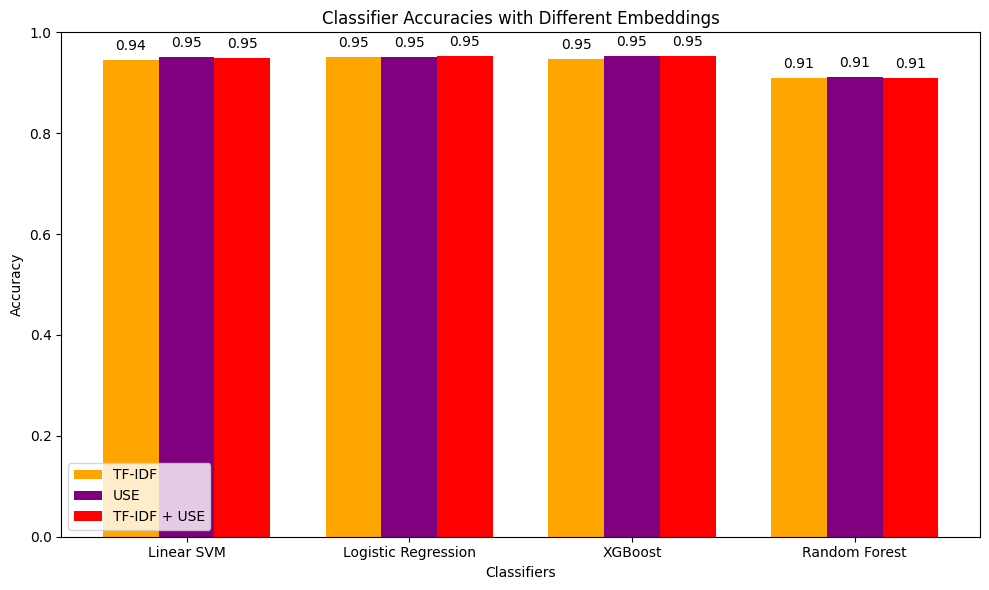

In [84]:
# Define the classifiers and their corresponding accuracies
classifiers = ['Linear SVM', 'Logistic Regression', 'XGBoost', 'Random Forest']
tfidf_accuracies = [accuracy_svm, accuracy_lr, accuracy_xgboost, accuracy_rfc]  # Replace with actual accuracy values
use_accuracies = [accuracy_svm_use, accuracy_lr_use, accuracy_xgboost_use, accuracy_rfc_use]  # Replace with actual accuracy values
tfidf_use_accuracies = [accuracy_svm_tfidf_use, accuracy_lr_tfidf_use, accuracy_xgb_tfidf_use, accuracy_rfc_tfidf_use]  # Replace with actual accuracy values

# Create an index for the x-axis
x = np.arange(len(classifiers))

# Set the width of the bars
bar_width = 0.25

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, tfidf_accuracies, bar_width, label='TF-IDF', color='orange')
plt.bar(x, use_accuracies, bar_width, label='USE', color='purple')
plt.bar(x + bar_width, tfidf_use_accuracies, bar_width, label='TF-IDF + USE', color='red')

# Set labels, title, and legend
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies with Different Embeddings')
plt.xticks(x, classifiers)
plt.ylim(0, 1.0)
plt.legend()

# Add accuracy values on top of the bars
for i in range(len(classifiers)):
    plt.text(x[i] - bar_width, tfidf_accuracies[i] + 0.02, f"{tfidf_accuracies[i]:.2f}", ha='center')
    plt.text(x[i], use_accuracies[i] + 0.02, f"{use_accuracies[i]:.2f}", ha='center')
    plt.text(x[i] + bar_width, tfidf_use_accuracies[i] + 0.02, f"{tfidf_use_accuracies[i]:.2f}", ha='center')

# Display the plot
plt.tight_layout()
plt.show()


**Kesimpulan:**

Grafik ini menunjukkan pengaruh berbagai metode embedding teks terhadap akurasi dari beberapa model klasifikasi. Secara keseluruhan, performa semua model relatif stabil dan tinggi, terutama untuk Linear SVM, Logistic Regression, dan XGBoost, yang semuanya mencapai akurasi antara 0.94 hingga 0.95, terlepas dari metode embedding yang digunakan (TF-IDF, USE, atau gabungan TF-IDF + USE). Ini menunjukkan bahwa ketiga metode embedding tersebut memberikan hasil yang sebanding pada model-model tersebut.

Sementara itu, Random Forest memiliki performa yang sedikit lebih rendah dibanding model lainnya, dengan akurasi 0.91 untuk ketiga jenis embedding. Meskipun perbedaannya tidak besar, ini menandakan bahwa Random Forest mungkin sedikit kurang optimal dibanding model lain dalam memanfaatkan fitur embedding teks untuk klasifikasi.

Menariknya, kombinasi TF-IDF + USE tidak menunjukkan peningkatan signifikan dibandingkan penggunaan TF-IDF atau USE secara terpisah. Hal ini menunjukkan bahwa untuk dataset dan tugas klasifikasi ini, penambahan kompleksitas fitur dari gabungan embedding belum memberikan keuntungan yang berarti.